# Pandas

## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

## * Pandas 데이터 입출력

### - csv 파일을 Series로 데이터로 읽어오기

In [139]:
# squeeze 매개변수는 하나의 열을 갖는 DataFrame을 Series로 변환
pokemons = pd.read_csv('datas/pokemon.csv', index_col='Pokemon').squeeze()

In [140]:
pokemons

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

In [141]:
# 데이터의 총 개수
pokemons.count()

809

In [143]:
# 제일 많이 갖고 있는 값 - Normal
# 제일 많이 갖는 값의 개수 - 65
pokemons.describe()

count        809
unique       159
top       Normal
freq          65
Name: Type, dtype: object

### - csv 파일을 Series로 데이터 읽어오기(2)

In [146]:
# parse_dates는 csv파일에서 데이터를 읽어들일 때
# 날짜 /시간으로 파싱해야하는 컬럼을 지정할 수 있습니다.
google = pd.read_csv('datas/google_stocks.csv',
                     parse_dates=["Date"],
                     index_col="Date").squeeze()
google

Date
2004-08-19      49.98
2004-08-20      53.95
2004-08-23      54.50
2004-08-24      52.24
2004-08-25      52.80
               ...   
2019-10-21    1246.15
2019-10-22    1242.80
2019-10-23    1259.13
2019-10-24    1260.99
2019-10-25    1265.13
Name: Close, Length: 3824, dtype: float64

In [147]:
# usecols 인수를 활용하면
# csv 파일로부터 pandas가 가져와야 하는 열의 목록을 지정할 수 있음.
war = pd.read_csv('datas/revolutionary_war.csv',
                  parse_dates=["Start Date"],
                  index_col="Start Date",
                  usecols=["Start Date", "State"]).squeeze()
war

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 232, dtype: object

# 1. Series class
- Numpy에서 제공하는 1차원 배열과 모양이 비슷
- 각 데이터의 의미를 표시하는 index를 붙일 수 있음
- 데이터 자체는 값(value) -> iterable, 배열, scalar value, dict

[image.png](attachment:ea928c17-4d6c-446f-8a79-e0121d2e8e7a.png)
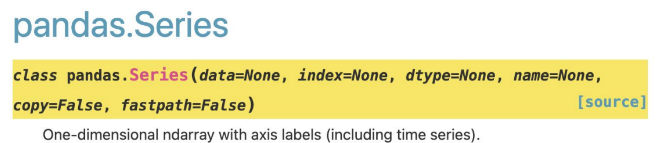

In [2]:
series = pd.Series(['하나', '둘', '셋', '넷', '다섯',
                   '여섯', '일곱', '여덟', '아홉', '열'],
                  index = [_ for _ in range(1,11)])
series

1     하나
2      둘
3      셋
4      넷
5     다섯
6     여섯
7     일곱
8     여덟
9     아홉
10     열
dtype: object

## 1) Series 생성하기

In [3]:
s = pd.Series([9_904_312, 3_448_737, 2_890_451, 2_466_052],
              index = ['서울', '부산', '인천', '대구'])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [4]:
# 연습 문제
s2 = pd.Series(range(10,100,10), index = range(9))

In [5]:
s2

0    10
1    20
2    30
3    40
4    50
5    60
6    70
7    80
8    90
dtype: int64

In [6]:
# index를 지정하지 않고 만들면 0부터 시작하는 정수 값이 됨.
pd.Series(range(10,14))

0    10
1    11
2    12
3    13
dtype: int64

In [7]:
# index는 'index'3 속성으로 접근 가능
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [8]:
# value는 1차원 배열이며 'values' 속성으로 접근 가능
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [9]:
pd.Series()

C:\Users\user\AppData\Local\Temp\ipykernel_11432\2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [10]:
# 연습 문제
len(s2[s2.values>50])

4

In [11]:
# 풀이
sum(s2.values>50)

4

In [12]:
# name 속성을 이용하여 Series데이터 이름 삽입 가능
# index.name 속성 이용하여 index에 이름 삽입 가능
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [13]:
# dict
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

** dict 일 때 index가 최초에 dict의 key로 만들어져 있고, Series는 index키워드로 전달받은 인수로 index를 재할당함. 그래서, 밑에 예제와 같이 Series 객체의 값이 NaN의 결과를 출력하는 것을 확인 가능.

* Nan 값이 float 자료형에서만 표현 가능하므로 결과가 float 자료형이 되었다는 점에 주의

In [14]:
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['x','y','z'])
ser

x   NaN
y   NaN
z   NaN
dtype: float64

In [15]:
# 연습 문제
social = pd.Series([88,95,100,67], index=['철수','영희','길동','몽룡'])
social

철수     88
영희     95
길동    100
몽룡     67
dtype: int64

## 2) Series index를 속성처럼 활용
    -> label값이 공백없는 문자열인 경우 index label이 속성인 것처럼 마침표(.)를 활용하여 해당 index값에 접근 가능

In [16]:
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

In [17]:
ser.a, ser.b, ser.c

(1, 2, 3)

In [18]:
e = pd.Series({'가나다': 1})
e

가나다    1
dtype: int64

In [19]:
e.가나다

1

## 3) 특징
    -> index label을 키(key)로 사용하기에 딕셔너리 자료형과 비슷한 특징

In [20]:
"서울" in s # 인덱스 레이블 중에 서울이 있는가?

True

In [21]:
"대전" in s # 인덱스 레이블 중에 대전이 있는가?

False

In [22]:
for k, v in s.items():
    print(f'{k}, {v}')

서울, 9904312
부산, 3448737
인천, 2890451
대구, 2466052


In [23]:
test = dict(zip(range(10), list("영일이삼사오육칠팔구")))
test

{0: '영',
 1: '일',
 2: '이',
 3: '삼',
 4: '사',
 5: '오',
 6: '육',
 7: '칠',
 8: '팔',
 9: '구'}

In [24]:
# dict
for k, v in test.items():
    print(f'{k}, {v}')

0, 영
1, 일
2, 이
3, 삼
4, 사
5, 오
6, 육
7, 칠
8, 팔
9, 구


In [25]:
# 연습문제
for k, v in s.items():
    if v > 3_000_000:
        print(f'{k}의 인구는 300만이 넘습니다.')

서울의 인구는 300만이 넘습니다.
부산의 인구는 300만이 넘습니다.


In [26]:
[f'{k}의 인구는 300만이 넘습니다.' for k, v in s.items() if v > 3_000_000]

['서울의 인구는 300만이 넘습니다.', '부산의 인구는 300만이 넘습니다.']

## 4) Series 연산
    * Series의 value에만 적용/ index값은 변하지 x

In [27]:
s / 1_000_000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

## 5) Series 인덱싱

    -> 자료의 순서를 바꾸거나 특정한 자료만 취사 선택 가능

In [28]:
s[1], s['부산']

(3448737, 3448737)

In [29]:
s[3], s['대구']

(2466052, 2466052)

In [30]:
s[[0,3,1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [31]:
s[['서울', '대구', '부산']]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [32]:
# 단 하나의 값을 시리즈 형태로 가져오고 싶다 -> 값이 하나인 리스트로 인덱싱 작성
s[[0]]

도시
서울    9904312
Name: 인구, dtype: int64

In [33]:
# 연습 문제
s[['인천']]

도시
인천    2890451
Name: 인구, dtype: int64

## 6) Series 슬라이싱
    * 단, 문자열 label을 이용한 슬라이싱을 이용한 경우에는 숫자 인덱싱과 달리 콜론(:) 기호 뒤에 오는 것도 결과에 포함

In [34]:
s[1:3] # 두번째(1)부터 세번째(2)까지 (네번째(3) 미포함)

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [35]:
s['부산':'대구'] # 부산에서 대구까지 (대구도 포함)

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

## 7) Series index 기반 연산

In [36]:
s2 = pd.Series({'서울':9_631_482, '부산': 3_393_191, '인천': 2_632_035, '대전': 1_490_158})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [37]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [38]:
np.nan - 20

nan

### - Series에서 값이 NaN인지 확인
    -> isnull() method

In [39]:
ds.isnull()

대구     True
대전     True
부산    False
서울    False
인천    False
dtype: bool

### - Series에서 값이 NaN이 아닌지 확인
    -> notnull() method

In [40]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

### - Series에서 NaN이 아닌 값만 인덱싱으로 구하기

In [41]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [42]:
s[s>3_000_000]

도시
서울    9904312
부산    3448737
Name: 인구, dtype: int64

### - Series에서 NaN이 아닌 값 구하기

In [43]:
s # 2015년 도시별 인구

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [44]:
s2 # 2010년 도시별 인구

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [45]:
rs = (s - s2) / s2 * 100
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [46]:
# 연습문제
s3 = (s - s2)
s3

s3_result = s3.max()
s3_result

s3[s3 == s3_result]

서울    272830.0
dtype: float64

In [47]:
# 풀이 => nan 값을 제외한 인덱싱 찾아 결과 산출
ds = s - s2 
ds = ds[ds.notnull()]
ds[[ds.values.argmax()]]

서울    272830.0
dtype: float64

## 8) Series 데이터 추가, 갱신, 삭제

In [48]:
rs["부산"] = 1.63

In [49]:
rs

부산    1.630000
서울    2.832690
인천    9.818107
dtype: float64

In [50]:
# 연습 문제
# 인덱싱
rs['서울'] = 2.83
rs['인천'] = 9.82

In [51]:
# 슬라이싱
rs[1:2] = 2.84
rs[2:3] = 9.81

In [52]:
# 풀이 
rs['서울':'인천'] = (2.83, 9.82)

In [53]:
rs

부산    1.63
서울    2.83
인천    9.82
dtype: float64

In [54]:
del rs['서울']
rs

부산    1.63
인천    9.82
dtype: float64

In [55]:
# 연습문제 
fin1 = {'카카오':60010, '삼성전자':61000, 'LG전자':90000}
fin2_value = [60200, 61200,200100]
fin2_index = ['카카오','삼성전자','네이버']

In [56]:
ser_finance1 = pd.Series(fin1)
ser_finance2 = pd.Series(fin2_value, index=fin2_index)

In [57]:
ser_finance1

카카오     60010
삼성전자    61000
LG전자    90000
dtype: int64

In [58]:
ser_finance2

카카오      60200
삼성전자     61200
네이버     200100
dtype: int64

In [59]:
# 연습문제
ser_finance1 - ser_finance2

LG전자      NaN
네이버       NaN
삼성전자   -200.0
카카오    -190.0
dtype: float64

In [60]:
ser_finance1 + ser_finance2

LG전자         NaN
네이버          NaN
삼성전자    122200.0
카카오     120210.0
dtype: float64

In [61]:
ser_finance1 * ser_finance2

LG전자             NaN
네이버              NaN
삼성전자    3.733200e+09
카카오     3.612602e+09
dtype: float64

In [62]:
ser_finance1 / ser_finance2

LG전자         NaN
네이버          NaN
삼성전자    0.996732
카카오     0.996844
dtype: float64

-> 연산 후의 결과값에 NaN 값이 포함되어있어서

In [63]:
type(np.nan)

float

In [64]:
# 연습 문제

result = ser_finance1 - ser_finance2
result

LG전자      NaN
네이버       NaN
삼성전자   -200.0
카카오    -190.0
dtype: float64

In [65]:
result = ser_finance1 - ser_finance2
result[pd.notnull(result)]

삼성전자   -200.0
카카오    -190.0
dtype: float64

## 9) Series의 값이 많은 경우 

In [107]:
nums = pd.Series(range(500))
nums

0        0
1        1
2        2
3        3
4        4
      ... 
495    495
496    496
497    497
498    498
499    499
Length: 500, dtype: int64

## 10) Series head() 메서드
    -> head()
        => default: 5

In [108]:
nums.head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

## 11) Series tail() 메서드
    -> tail()
        => default: 5

In [109]:
nums.tail(10)

490    490
491    491
492    492
493    493
494    494
495    495
496    496
497    497
498    498
499    499
dtype: int64

## 12) Series 수학 연산

In [110]:
nums = pd.Series([1, 2, np.nan, 4, 5])
nums

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

## 13) Series 수학 연산 - nunique() 메서드
    -> 고유한 값의 개수를 계산할 때 사용

In [111]:
hello = pd.Series(list("hello"))
hello

0    h
1    e
2    l
3    l
4    o
dtype: object

In [112]:
hello.nunique()

4

## 14) Series 수학 연산 - count() 메서드
    -> nan인 값에 대해서는 개수에 포함하지 x

In [113]:
nums.count()

4

In [114]:
len(nums)

5

## 15) Series 수학 연산 - sum() 메서드
    -> skip.na 파라미터의 기본 값이 true여서 결측치를 포함하지 않고 계산

In [115]:
nums.sum()

12.0

In [116]:
nums.sum(skipna=False)

nan

## 16) Series 수학 연산 - mean(), median(), std() 메서드

In [117]:
nums.mean()

3.0

In [118]:
nums.median()

3.0

In [119]:
nums.std()

1.8257418583505538

## 17) Series 수학 연산 - max(), min() 메서드

In [120]:
nums.max()

5.0

In [121]:
nums.min()

1.0

### * 문자열 - ord() 함수: 하나의 문자를 Unicode 숫자로 변경

In [122]:
somechar = pd.Series(list("AaBbCc"))
somechar

0    A
1    a
2    B
3    b
4    C
5    c
dtype: object

In [123]:
somechar.max()

'c'

In [124]:
somechar.min()

'A'

In [125]:
ord('A')

65

In [126]:
ord('c')

99

In [127]:
ord('ㄱ')

12593

## 18) Series 수학 연산 - describe() 메서드

In [128]:
# 수치형 - count, mean, std, min, 25%, median, 75%, max
nums.describe()

count    4.000000
mean     3.000000
std      1.825742
min      1.000000
25%      1.750000
50%      3.000000
75%      4.250000
max      5.000000
dtype: float64

In [129]:
# 문자열 - count, unique, top, freq
hello.describe()

count     5
unique    4
top       l
freq      2
dtype: object

## 19) Series의 변환
    -> 파이썬의 기본 자료구조(list, dict 등) 변경 가능

In [130]:
nums

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

In [131]:
list(nums)

[1.0, 2.0, nan, 4.0, 5.0]

In [132]:
dict(nums)

{0: 1.0, 1: 2.0, 2: nan, 3: 4.0, 4: 5.0}

In [133]:
# 연습문제
superheros = [
    "Batman",
    "Superman",
    "Spider-Man",
    "Iron Man",
    "Captain America",
    "Wonder Woman"
]

strength_levels = (100, 120, 90, 95, 110, 120)

In [134]:
heros = pd.Series(strength_levels, superheros)
heros

Batman             100
Superman           120
Spider-Man          90
Iron Man            95
Captain America    110
Wonder Woman       120
dtype: int64

In [135]:
heros.tail(4)

Spider-Man          90
Iron Man            95
Captain America    110
Wonder Woman       120
dtype: int64

In [136]:
heros.nunique()

5

In [137]:
# 평균
heros.mean()

# 중앙값
heros.median()

# 최대값
heros.max()

# 최소값
heros.min()

90

In [138]:
dict(heros)

{'Batman': 100,
 'Superman': 120,
 'Spider-Man': 90,
 'Iron Man': 95,
 'Captain America': 110,
 'Wonder Woman': 120}

## 20) Series의 값 정렬하기 sort_values() 메서드

In [144]:
pokemons.sort_values()

Pokemon
Illumise                Bug
Silcoon                 Bug
Pinsir                  Bug
Burmy                   Bug
Wurmple                 Bug
                  ...      
Tirtouga       Water / Rock
Relicanth      Water / Rock
Corsola        Water / Rock
Carracosta     Water / Rock
Empoleon      Water / Steel
Name: Type, Length: 809, dtype: object

In [145]:
pokemons.sort_values(ascending=False) # 반대로

Pokemon
Empoleon      Water / Steel
Corsola        Water / Rock
Relicanth      Water / Rock
Carracosta     Water / Rock
Tirtouga       Water / Rock
                  ...      
Kricketune              Bug
Cascoon                 Bug
Scatterbug              Bug
Kricketot               Bug
Grubbin                 Bug
Name: Type, Length: 809, dtype: object

In [148]:
war.describe()

count                162
unique                17
top       South Carolina
freq                  31
Name: State, dtype: object

In [149]:
# 연습문제 
# nan값을 갖는 데이터는 총 몇개인가? - 70
len(war) - war.count()

# 풀이
war.isnull().sum()

70

In [150]:
# 결측치를 제외한 값의 갯수는 몇인가? - 162
war.count()

162

In [151]:
# 유일한 값의 개수는 총 몇개인가? - 17
war.nunique()

17

## 21) Series의 값 정렬하기 sort_values() 메서드  - 2

In [152]:
war.sort_values(na_position='first')

Start Date
1775-09-17         NaN
1775-12-31         NaN
1776-03-03         NaN
1776-03-25         NaN
1776-05-18         NaN
                ...   
1781-07-06    Virginia
1781-07-01    Virginia
1781-06-26    Virginia
1781-04-25    Virginia
1783-01-22    Virginia
Name: State, Length: 232, dtype: object

In [153]:
war.sort_values(na_position='last')

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
                 ...     
1782-08-08            NaN
1782-08-25            NaN
1782-09-13            NaN
1782-10-18            NaN
1782-12-06            NaN
Name: State, Length: 232, dtype: object

## 22) Series의 값 중 nan 배제하기 dropna()

In [154]:
war.dropna()

Start Date
1774-09-01     Massachusetts
1774-12-14     New Hampshire
1775-04-19     Massachusetts
1775-04-19     Massachusetts
1775-04-20          Virginia
                   ...      
1782-08-15          Virginia
1782-08-19          Virginia
1782-08-26    South Carolina
1782-09-11          Virginia
1783-01-22          Virginia
Name: State, Length: 162, dtype: object

## 23) Series의 index를 기준으로 정렬하기

In [155]:
pokemons.sort_index(ascending=True)

Pokemon
Abomasnow        Grass / Ice
Abra                 Psychic
Absol                   Dark
Accelgor                 Bug
Aegislash      Steel / Ghost
                  ...       
Zoroark                 Dark
Zorua                   Dark
Zubat        Poison / Flying
Zweilous       Dark / Dragon
Zygarde      Dragon / Ground
Name: Type, Length: 809, dtype: object

In [156]:
pokemons.sort_index(ascending=False)

Pokemon
Zygarde      Dragon / Ground
Zweilous       Dark / Dragon
Zubat        Poison / Flying
Zorua                   Dark
Zoroark                 Dark
                  ...       
Aegislash      Steel / Ghost
Accelgor                 Bug
Absol                   Dark
Abra                 Psychic
Abomasnow        Grass / Ice
Name: Type, Length: 809, dtype: object

In [157]:
# NaT - Not a Time의 줄임말, 날짜/시간 유형의 데이터
war.sort_index()

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1783-01-22         Virginia
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
Name: State, Length: 232, dtype: object

In [158]:
war.sort_index(na_position='first')

Start Date
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
1774-09-01    Massachusetts
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 232, dtype: object

In [159]:
war.sort_index(na_position='last')

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1783-01-22         Virginia
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
Name: State, Length: 232, dtype: object

## 24) Series의 index에 NaT 배제하기(참고)

In [160]:
war.loc[war.index.dropna()] # dropna()를 쓰려면 index의 중복이 없어야 한다.

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-19    Massachusetts
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 250, dtype: object

In [161]:
war.index.dropna()

DatetimeIndex(['1774-09-01', '1774-12-14', '1775-04-19', '1775-04-19',
               '1775-04-20', '1775-05-10', '1775-05-27', '1775-06-11',
               '1775-06-17', '1775-08-08',
               ...
               '1782-08-08', '1782-08-15', '1782-08-19', '1782-08-26',
               '1782-08-25', '1782-09-11', '1782-09-13', '1782-10-18',
               '1782-12-06', '1783-01-22'],
              dtype='datetime64[ns]', name='Start Date', length=228, freq=None)

In [162]:
war.loc[war.index.notnull()] # 1:1 매핑하여 수를 확인함

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 228, dtype: object

In [163]:
# 연습 문제
google.sort_values(ascending=False).head(10)

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
2018-07-25    1263.70
2019-04-25    1263.45
2019-10-24    1260.99
2019-10-23    1259.13
2019-04-24    1256.00
Name: Close, dtype: float64

In [164]:
google.sort_values().head(10)

Date
2004-09-03    49.82
2004-09-01    49.94
2004-08-19    49.98
2004-09-02    50.57
2004-09-07    50.60
2004-08-30    50.81
2004-09-08    50.96
2004-09-09    50.96
2004-08-31    50.99
2004-08-24    52.24
Name: Close, dtype: float64

## 25) Series nsmallest(), nlargest() 메서드

In [165]:
google.nlargest(10)

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
2018-07-25    1263.70
2019-04-25    1263.45
2019-10-24    1260.99
2019-10-23    1259.13
2019-04-24    1256.00
Name: Close, dtype: float64

In [166]:
google.nsmallest(10)

Date
2004-09-03    49.82
2004-09-01    49.94
2004-08-19    49.98
2004-09-02    50.57
2004-09-07    50.60
2004-08-30    50.81
2004-09-08    50.96
2004-09-09    50.96
2004-08-31    50.99
2004-08-24    52.24
Name: Close, dtype: float64

## 26) Series value_counts() 메서드

In [167]:
pokemons.value_counts()

Normal                65
Water                 61
Grass                 38
Psychic               35
Fire                  30
                      ..
Fire / Psychic         1
Normal / Ground        1
Psychic / Fighting     1
Dark / Ghost           1
Fire / Ghost           1
Name: Type, Length: 159, dtype: int64

In [168]:
bins = np.linspace(0, 1400, 8)
bins

array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.])

In [169]:
# 소괄호((,))는 해당 값의 미포함을 나타내며, 대괄호([,])는 해당 값을 포함한다는 의미
google.value_counts(bins=bins)

(200.0, 400.0]      1568
(-0.001, 200.0]      595
(400.0, 600.0]       575
(1000.0, 1200.0]     406
(600.0, 800.0]       380
(800.0, 1000.0]      207
(1200.0, 1400.0]      93
Name: Close, dtype: int64

In [170]:
# 연습 문제

bins = np.linspace(0, 1400, 8)
bins

google.value_counts(bins=bins).sort_index()

(-0.001, 200.0]      595
(200.0, 400.0]      1568
(400.0, 600.0]       575
(600.0, 800.0]       380
(800.0, 1000.0]      207
(1000.0, 1200.0]     406
(1200.0, 1400.0]      93
Name: Close, dtype: int64

In [171]:
# bins(단, 구간의 크기가 일정치 않을 수 있음), sort 옵션
google.value_counts(bins=8, sort=False)

(48.581, 204.54]       651
(204.54, 359.26]      1435
(359.26, 513.98]       263
(513.98, 668.7]        466
(668.7, 823.42]        334
(823.42, 978.14]       161
(978.14, 1132.86]      283
(1132.86, 1287.58]     231
Name: Close, dtype: int64

## 27) Series에 loc, iloc, at, iat

In [295]:
nba.Salary.loc['Damian Lillard']

29802321

In [296]:
nba.Salary.at['Damian Lillard']

29802321

In [297]:
nba.Salary.iloc[234]

2033160

In [298]:
nba.Salary.iat[234]

2033160

## 28) Series apply() 메서드

    * Series.apply(func, convert_dtype=True, args=(), **kwargs)

In [311]:
pokemons = pd.read_csv('datas/pokemon.csv', index_col=['Pokemon']).squeeze()
pokemons

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

In [312]:
def single_or_multi(type):
    if '/' in type:
        return 'Multi'
    return 'Single'

In [313]:
pokemons.apply(single_or_multi)

Pokemon
Bulbasaur       Multi
Ivysaur         Multi
Venusaur        Multi
Charmander     Single
Charmeleon     Single
                ...  
Stakataka       Multi
Blacephalon     Multi
Zeraora        Single
Meltan         Single
Melmetal       Single
Name: Type, Length: 809, dtype: object

In [314]:
# 연습문제
pokemons.apply(single_or_multi).value_counts()

Multi     405
Single    404
Name: Type, dtype: int64

## 29) Series 중복 처리하기 duplicated() 메서드

In [43]:
employees['Team'].head()

0    Marketing
1          NaN
2      Finance
3      Finance
4           IT
Name: Team, dtype: object

In [44]:
employees['Team'].duplicated().head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

In [45]:
employees['Team']

0          Marketing
1                NaN
2            Finance
3            Finance
4                 IT
            ...     
996          Finance
997          Product
998     Business Dev
999            Sales
1000             NaN
Name: Team, Length: 1001, dtype: object

In [46]:
employees['Team'].duplicated(keep='last')

0        True
1        True
2        True
3        True
4        True
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Team, Length: 1001, dtype: bool

# 2.DataFrame class
    -> label된 row와 column, 두 개의 축을 갖는 데이터 구조
    -> 산술 연산은 row와 column 모두 적용
    -> Series 객체를 갖는 dictionary
    
[image.png](attachment:4b8abf96-f654-46ea-89d4-bbd179f0c4ac.png)
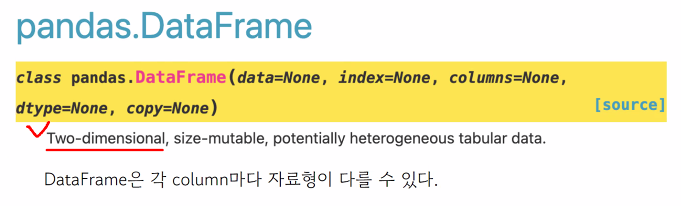

## 1) DataFrame 생성

In [66]:
# 딕셔너리 형태
d = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [67]:
data = {
    "2015" : [9904312, 3448737, 2890451, 2466052],
    "2010" : [9631482, 3393191, 2632035, 2431774],
    "2005" : [9762546, 3512547, 2517680, 2456016],
    "2000" : [9853972, 3655437, 2466338, 2473990],
    "지역" : ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율" :[0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index = index, columns = columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [68]:
df.dtypes

지역                object
2015               int64
2010               int64
2005               int64
2000               int64
2010-2015 증가율    float64
dtype: object

## 2) Dataframe의 속성 values, columns, index

In [69]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [70]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [71]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

## 3) Dataframe 이름 붙이기

In [72]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [73]:
# 
kbo_pitcher = pd.read_csv('kbo_pitcher.csv', encoding='utf-8')
kbo_pitcher

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
0,1,안우진,키움,2.11,30,15,8,0,0,0.652,196,131,4,55,4,224,51,46,0.95
1,2,김광현,SSG,2.13,28,13,3,0,0,0.813,173 1/3,141,10,45,5,153,48,41,1.07
2,3,플럿코,LG,2.39,28,15,5,0,0,0.750,162,125,13,38,2,149,53,43,1.01
3,4,수아레즈,삼성,2.49,30,6,8,0,0,0.429,173 2/3,151,7,50,4,159,61,48,1.16
4,5,켈리,LG,2.54,27,16,4,0,0,0.800,166 1/3,144,10,35,2,153,50,47,1.08
5,6,요키시,키움,2.57,30,10,8,0,0,0.556,185 1/3,169,8,33,5,154,61,53,1.09
6,7,폰트,SSG,2.69,28,13,6,0,0,0.684,184,141,18,34,6,170,63,55,0.95
7,8,루친스키,NC,2.97,31,10,12,0,0,0.455,193 2/3,184,14,34,8,194,77,64,1.13
8,9,뷰캐넌,삼성,3.04,26,11,8,0,0,0.579,160,176,10,39,8,117,61,54,1.34
9,10,소형준,KT,3.05,27,13,6,0,0,0.684,171 1/3,158,8,39,5,117,68,58,1.15


In [74]:
kbo_pitcher.dtypes

순위        int64
선수명      object
팀명       object
ERA     float64
G         int64
W         int64
L         int64
SV        int64
HLD       int64
WPCT    float64
IP       object
H         int64
HR        int64
BB        int64
HBP       int64
SO        int64
R         int64
ER        int64
WHIP    float64
dtype: object

In [75]:
# 
data = {
    '순위': range(1,23),
    '선수명': ['안우진','김광현','플럿코','수아레즈','켈리','요키시','폰트','루친스키','뷰캐넌','소형준','고영표','스탁','최원준','반즈','곽빈','양현종','이의리','박세웅','원태인','김민우','오원석','데스파이네'],
    '팀명': ['키움','SSG','LG','삼성','LG','키움','SSG','NC','삼성','KT','KT','두산','두산','롯데','두산','KIA','KIA','롯데','삼성','한화','SSG','KT'],
    '평균자책점': [2.11,2.13,2.39,2.49,2.54,2.57,2.69,2.97,3.04,3.05,3.2,3.6,3.6,3.62,3.78,3.85,3.86,3.89,3.92,4.36,4.5,4.53]
}
index = range(1,23)
columns = ['순위','선수명','팀명','평균자책점']

kbo_pitcher_2 = pd.DataFrame(data, columns = columns, index=index)
                             
    
kbo_pitcher_2

,순위,선수명,팀명,평균자책점
1,1,안우진,키움,2.11
2,2,김광현,SSG,2.13
3,3,플럿코,LG,2.39
4,4,수아레즈,삼성,2.49
5,5,켈리,LG,2.54
6,6,요키시,키움,2.57
7,7,폰트,SSG,2.69
8,8,루친스키,NC,2.97
9,9,뷰캐넌,삼성,3.04
10,10,소형준,KT,3.05


## 4) DataFrame 전치(Tranpose) 

In [76]:
kbo_pitcher_2.T

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
순위,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
선수명,안우진,김광현,플럿코,수아레즈,켈리,요키시,폰트,루친스키,뷰캐넌,소형준,...,최원준,반즈,곽빈,양현종,이의리,박세웅,원태인,김민우,오원석,데스파이네
팀명,키움,SSG,LG,삼성,LG,키움,SSG,NC,삼성,KT,...,두산,롯데,두산,KIA,KIA,롯데,삼성,한화,SSG,KT
평균자책점,2.11,2.13,2.39,2.49,2.54,2.57,2.69,2.97,3.04,3.05,...,3.6,3.62,3.78,3.85,3.86,3.89,3.92,4.36,4.5,4.53


In [77]:
df['2010-2015 증가율'] = df['2010-2015 증가율'] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


## 5) DataFrame column 추가,갱신,삭제

In [78]:
# 추가
df['2005-2010 증가율'] = ((df['2010'] - df['2005'])/ df['2005'] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [79]:
# 삭제
del df['2010-2015 증가율']
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


## 6) DataFrame column 인덱싱
    -> column label을 키로, column Series를 값으로 가지는 딕셔너리와 비슷
 

In [80]:
# 하나의 column만 인덱싱하면 Series가 반환된다.
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [81]:
# 2010이라는 column을 반환하면서 Series 자료형으로 반환
df['2010']

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [82]:
type(df['2010'])

pandas.core.series.Series

In [83]:
# 여러 개의 column을 인덱싱하면 부분적인 DataFrame이 반환된다.
df[['2010','2015']]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [84]:
# 2010이라는 column을 반환하면서 DataFrame 자료형을 유지
df[['2010']]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [85]:
type(df[['2010']])

pandas.core.frame.DataFrame

In [86]:
# 정수 index를 column 인덱싱에 사용할 수 없다.
df[1]

KeyError: 1

* 별도의 columns 키워드 인수를 전달하지 않으면 RangeIndex를 기본값으로 부여합니다.

In [87]:
df2 = pd.DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [88]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [89]:
df2[[1,2]]

,1,2
0,1,2
1,5,6
2,9,10


## 7) DataFrame row 슬라이싱
    -> row 단위 인덱싱을 하고자 하면 항상 슬라이싱
    -> index 값이 문자 label이면 label 슬라이싱도 가능

In [90]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [91]:
df[:1] # df['서울'] --> 문자는 포함, 숫자는 미포함

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [92]:
df[1:2]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [93]:
df['부산':'부산']

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


## 8) DataFrame row 인덱싱할 경우
    -> row 단위로 인덱싱을 하면 KeyError 발생

In [94]:
df['서울']

KeyError: '서울'

## 9) DataFrame 개별 데이터 인덱싱

In [95]:
df['2015']['서울']

9904312

In [96]:
type(df['2015']['서울'])

numpy.int64

### -> * 역순은 가능?

In [97]:
df['서울':'서울']

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [98]:
df['서울':'서울']['2015']

도시
서울    9904312
Name: 2015, dtype: int64

In [99]:
type(df['서울':'서울']['2015'])

pandas.core.series.Series

In [100]:
# 연습문제
data = {
    '국어': [80,90,70,30],
    '영어': [90,70,60,40],
    '수학': [90,60,80,70],
}

columns = ['국어', '영어', '수학']
index = ['춘향', '몽룡', '향단', '방자']
df = pd.DataFrame(data, index=index, columns=columns)
df

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [101]:
# 1) 모든 학생의 수학 점수를 Series로 나타낸다.
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [102]:
# 2) 모든 학생의 국어와 영어 점수를 데이터프레임으로 나타낸다.
df[['국어','영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,60
방자,30,40


In [103]:
# 3) 모든 학생의 각 과목 평균 점수를 새로운 열을 추가한다.
df['평균'] = (df['수학'] + df['국어'] + df['영어'])/ 3
df

,국어,영어,수학,평균
춘향,80,90,90,86.666667
몽룡,90,70,60,73.333333
향단,70,60,80,70.000000
방자,30,40,70,46.666667


In [104]:
# 4) 춘향의 점수를 DataFrame으로 나타낸다.
df[df.index == '춘향']

# 풀이
df[:1] # or df['춘향':'춘향']

,국어,영어,수학,평균
춘향,80,90,90,86.666667


In [105]:
# 5) 향단의 점수를 Series로 나타낸다.
df.T['향단']

국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64

In [106]:
# 연습 문제
np.random.seed(0)
result = pd.DataFrame(np.random.randn(6,4), 
                      index=pd.date_range('20130226', periods=6),
                      columns=['A','B','C','D'])
result

,A,B,C,D
2013-02-26,1.764052,0.400157,0.978738,2.240893
2013-02-27,1.867558,-0.977278,0.950088,-0.151357
2013-02-28,-0.103219,0.410599,0.144044,1.454274
2013-03-01,0.761038,0.121675,0.443863,0.333674
2013-03-02,1.494079,-0.205158,0.313068,-0.854096
2013-03-03,-2.552990,0.653619,0.864436,-0.742165


In [193]:
# 데이터 시각화 패키지
import seaborn as sns

In [194]:
titanic = sns.load_dataset('titanic')

In [195]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 10) DataFrame head() 메서드

In [196]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


## 11) DataFrame tail() 메서드

In [197]:
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## 12) DataFrame sample() 메서드

In [198]:
titanic.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
568,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
249,0,2,male,54.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,no,False


## 13) DataFrame nunique() 메서드

In [199]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

## 14) DataFrame count() 메서드

In [200]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [201]:
len(titanic) # row의 전체 크기를 알려준다.

891

## 15) DataFrame 타입 조회하기

In [202]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

## 16) DataFrame 수학 연산 sum() 메서드

In [203]:
titanic.sum(numeric_only=True)

survived        342.0000
pclass         2057.0000
age           21205.1700
sibsp           466.0000
parch           340.0000
fare          28693.9493
adult_male      537.0000
alone           537.0000
dtype: float64

## 17) DataFrame 수학 연산 mean(), median(), std() 메서드

In [204]:
titanic.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [205]:
titanic.median(numeric_only=True)

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [206]:
titanic.std(numeric_only=True)

survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

## 18) DataFrame 수학 연산 max(), min() 메서드

In [207]:
titanic.max(numeric_only=True)

survived             1
pclass               3
age               80.0
sibsp                8
parch                6
fare          512.3292
adult_male        True
alone             True
dtype: object

In [208]:
titanic.min(numeric_only=True)

survived          0
pclass            1
age            0.42
sibsp             0
parch             0
fare            0.0
adult_male    False
alone         False
dtype: object

## 19) DataFrame 수학 연산 축의 방향

In [209]:
# row
titanic[['age', 'fare', 'survived']].sum(axis='rows')

age         21205.1700
fare        28693.9493
survived      342.0000
dtype: float64

In [210]:
titanic[['age', 'fare', 'survived']].sum(axis=0)

age         21205.1700
fare        28693.9493
survived      342.0000
dtype: float64

In [211]:
# column
titanic[['age', 'fare', 'survived']].sum(axis='columns')

0       29.2500
1      110.2833
2       34.9250
3       89.1000
4       43.0500
         ...   
886     40.0000
887     50.0000
888     23.4500
889     57.0000
890     39.7500
Length: 891, dtype: float64

In [212]:
titanic[['age', 'fare', 'survived']].sum(axis=1)

0       29.2500
1      110.2833
2       34.9250
3       89.1000
4       43.0500
         ...   
886     40.0000
887     50.0000
888     23.4500
889     57.0000
890     39.7500
Length: 891, dtype: float64

## 20) DataFrame nsmallest(), nlargest() 메서드

In [213]:
titanic.nlargest(3, columns=['fare','age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [214]:
titanic.nsmallest(3, columns=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False


## 21) DataFrame describe() 메서드

In [215]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [216]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### NBA 데이터 가져오기

In [ ]:
nba = pd.read_csv('datas/nba.csv',
                 parse_dates=["Birthday"])
nba

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,1996-09-26,1445697
1,Christian Wood,Detroit Pistons,PF,1995-09-27,1645357
2,PJ Washington,Charlotte Hornets,PF,1998-08-23,3831840
3,Derrick Rose,Detroit Pistons,PG,1988-10-04,7317074
4,Marial Shayok,Philadelphia 76ers,G,1995-07-26,79568
...,...,...,...,...,...
445,Austin Rivers,Houston Rockets,PG,1992-08-01,2174310
446,Harry Giles,Sacramento Kings,PF,1998-04-22,2578800
447,Robin Lopez,Milwaukee Bucks,C,1988-04-01,4767000
448,Collin Sexton,Cleveland Cavaliers,PG,1999-01-04,4764960


In [218]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      450 non-null    object        
 1   Team      450 non-null    object        
 2   Position  450 non-null    object        
 3   Birthday  450 non-null    datetime64[ns]
 4   Salary    450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 17.7+ KB


In [219]:
# 연습 문제
nba.dtypes

Name                object
Team                object
Position            object
Birthday    datetime64[ns]
Salary               int64
dtype: object

In [220]:
nba.dtypes.value_counts()

object            3
datetime64[ns]    1
int64             1
dtype: int64

In [221]:
# 연습 문제
# 차원의 수: 2
nba.ndim

2

In [222]:
# 모양: (450,5)
nba.shape

(450, 5)

In [223]:
# 컬럼 인덱스: Index(['Name', 'Team', 'Position', 'Birthday', 'Salary'], dtype='object')
nba.columns

Index(['Name', 'Team', 'Position', 'Birthday', 'Salary'], dtype='object')

In [224]:
# 로우 인덱스: RangeIndex(start=0, stop=450, step=1)
nba.index

RangeIndex(start=0, stop=450, step=1)

In [225]:
# 연습 문제
# 결측치 칼럼 - 갯수: 없음
nba.isnull().sum()

Name        0
Team        0
Position    0
Birthday    0
Salary      0
dtype: int64

In [226]:
# 전체 모든 데이터의 갯수 - 2250
nba.count().sum()

2250

In [227]:
!pip install pandas_profiling

In [228]:
import pandas_profiling
nba.profile_report()

C:\Users\user\AppData\Local\Temp\ipykernel_11432\1671078508.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [229]:
# 연습 문제
nba.nunique()

Name        450
Team         30
Position      9
Birthday    430
Salary      269
dtype: int64

In [230]:
nba.max()

Name             Zylan Cheatham
Team         Washington Wizards
Position                     SG
Birthday    2000-12-23 00:00:00
Salary                 40231758
dtype: object

In [231]:
nba.min()

Name               Aaron Gordon
Team              Atlanta Hawks
Position                      C
Birthday    1977-01-26 00:00:00
Salary                    79568
dtype: object

In [232]:
# 연습 문제
nba.nlargest(5,columns=['Salary'])

,Name,Team,Position,Birthday,Salary
205,Stephen Curry,Golden State Warriors,PG,1988-03-14,40231758
38,Chris Paul,Oklahoma City Thunder,PG,1985-05-06,38506482
219,Russell Westbrook,Houston Rockets,PG,1988-11-12,38506482
251,John Wall,Washington Wizards,PG,1990-09-06,38199000
264,James Harden,Houston Rockets,PG,1989-08-26,38199000


In [233]:
# 연습 문제
nba.nsmallest(5,['Birthday'])

,Name,Team,Position,Birthday,Salary
98,Vince Carter,Atlanta Hawks,PF,1977-01-26,2564753
196,Udonis Haslem,Miami Heat,C,1980-06-09,2564753
262,Kyle Korver,Milwaukee Bucks,PF,1981-03-17,6004753
149,Tyson Chandler,Houston Rockets,C,1982-10-02,2564753
415,Andre Iguodala,Memphis Grizzlies,SF,1984-01-28,17185185


In [234]:
# 연습문제
# 합계
nba.sum(numeric_only=True)

Salary    3444112694
dtype: int64

In [235]:
# 평균
nba.mean(numeric_only=True)

Salary    7.653584e+06
dtype: float64

In [236]:
# 중앙값
nba.median(numeric_only=True)

Salary    3303074.5
dtype: float64

In [237]:
# 표준편차
nba.std(numeric_only=True)

Salary    9.288810e+06
dtype: float64

In [238]:
# 요약
nba.describe()

,Salary
count,4.500000e+02
mean,7.653584e+06
std,9.288810e+06
min,7.956800e+04
25%,1.618520e+06
50%,3.303074e+06
75%,1.012957e+07
max,4.023176e+07


## 22) DataFrame의 값 정렬하기 sort_values() 메서드

In [239]:
titanic.sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
277,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True


In [240]:
titanic.sort_values(by=['fare','age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
179,0,3,male,36.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0000,S,First,man,True,A,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [241]:
titanic.sort_values(by=['fare','age'],ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [242]:
titanic.sort_values(by=['fare','age','sex'],ascending=[False,True,True], na_position='last')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


## 23) DataFrame의 row index를 기준으로 정렬하기

In [243]:
titanic.sort_index(axis=1)

,adult_male,age,alive,alone,class,deck,embark_town,embarked,fare,parch,pclass,sex,sibsp,survived,who
0,True,22.0,no,False,Third,NaN,Southampton,S,7.2500,0,3,male,1,0,man
1,False,38.0,yes,False,First,C,Cherbourg,C,71.2833,0,1,female,1,1,woman
2,False,26.0,yes,True,Third,NaN,Southampton,S,7.9250,0,3,female,0,1,woman
3,False,35.0,yes,False,First,C,Southampton,S,53.1000,0,1,female,1,1,woman
4,True,35.0,no,True,Third,NaN,Southampton,S,8.0500,0,3,male,0,0,man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,27.0,no,True,Second,NaN,Southampton,S,13.0000,0,2,male,0,0,man
887,False,19.0,yes,True,First,B,Southampton,S,30.0000,0,1,female,0,1,woman
888,False,NaN,no,False,Third,NaN,Southampton,S,23.4500,2,3,female,1,0,woman
889,True,26.0,yes,True,First,C,Cherbourg,C,30.0000,0,1,male,0,1,man


In [244]:
titanic.sort_index(axis=1, ascending=False)

,who,survived,sibsp,sex,pclass,parch,fare,embarked,embark_town,deck,class,alone,alive,age,adult_male
0,man,0,1,male,3,0,7.2500,S,Southampton,NaN,Third,False,no,22.0,True
1,woman,1,1,female,1,0,71.2833,C,Cherbourg,C,First,False,yes,38.0,False
2,woman,1,0,female,3,0,7.9250,S,Southampton,NaN,Third,True,yes,26.0,False
3,woman,1,1,female,1,0,53.1000,S,Southampton,C,First,False,yes,35.0,False
4,man,0,0,male,3,0,8.0500,S,Southampton,NaN,Third,True,no,35.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,man,0,0,male,2,0,13.0000,S,Southampton,NaN,Second,True,no,27.0,True
887,woman,1,0,female,1,0,30.0000,S,Southampton,B,First,True,yes,19.0,False
888,woman,0,1,female,3,2,23.4500,S,Southampton,NaN,Third,False,no,NaN,False
889,man,1,0,male,1,0,30.0000,C,Cherbourg,C,First,True,yes,26.0,True


In [245]:
# 성별(sex) 인원수
titanic['sex'].value_counts().sort_values(ascending=False)

male      577
female    314
Name: sex, dtype: int64

In [246]:
# 나이별(age) 인원수
titanic['age'].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
66.00     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [247]:
# 선실별(class) 인원수
titanic['class'].value_counts().sort_values(ascending=False)

Third     491
First     216
Second    184
Name: class, dtype: int64

In [248]:
# 사망/생존(alive) 인원수
titanic['alive'].value_counts().sort_values(ascending=False)

no     549
yes    342
Name: alive, dtype: int64

## 24) DataFrame 고급 인덱싱
- loc: label값 기반의 2차원 인덱싱 - df.loc[row 인덱스]
- iloc: 순서를 나타내는 정수 기반의 2차원 인덱싱 - df.loc[row 인덱스, column 인덱스]

    * index 데이터
    * index 데이터 슬라이스
    * index 데이터 리스트
    * 같은 row 인덱스를 가지는 boolean Series(row 인덱싱의 경우)
    * 또는 위의 값들을 반환하는 함수

In [249]:
df = pd.DataFrame({
    'A': range(10,19,4),
    'B': range(11,20,4),
    'C': range(12,21,4),
    'D': range(13,22,4)},
    index = ['a','b','c'])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [250]:
df = pd.DataFrame(np.arange(10,22).reshape(3,4),
                index = ['a','b','c'],
                 columns=['A','B','C','D'])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [251]:
# 인덱싱
df.loc['a']

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [252]:
# 슬라이싱
df.loc['b':'c']

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [253]:
df['b':'c']

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [254]:
# 리스트 형태
df.loc[['b','c']]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [255]:
df[['b','c']]

KeyError: "None of [Index(['b', 'c'], dtype='object')] are in the [columns]"

In [256]:
df.A > 15

a    False
b    False
c     True
Name: A, dtype: bool

In [257]:
df.loc[df.A > 15]

,A,B,C,D
c,18,19,20,21


In [258]:
def select_rows(df, num):
    return df.A > num

In [259]:
select_rows(df, 10)

a    False
b     True
c     True
Name: A, dtype: bool

In [260]:
df.loc[select_rows(df, 10)]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [261]:
# column label 인덱싱이나 column label 리스트 인덱싱 x
df.loc['A'] #Keyerror

KeyError: 'A'

In [262]:
df.loc[['A','B']] # KeyError

KeyError: "None of [Index(['A', 'B'], dtype='object')] are in the [index]"

In [264]:
df2 = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns=['A','B','C','D'])
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


In [265]:
# row인덱스 값이 정수인 경우 - 마지막 값 포함 => 단, loc만
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


### - loc 인덱서 vs iloc 인덱서

In [266]:
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


In [267]:
df2.iloc[1:2]

,A,B,C,D
1,14,15,16,17


In [268]:
df.loc['a','A']

10

In [269]:
df.at['a','A']

10

In [270]:
df.loc['b':, 'A']

b    14
c    18
Name: A, dtype: int32

In [271]:
df.loc['a', :]

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [272]:
df.loc[['a','b'], ['B','D']]

,B,D
a,11,13
b,15,17


In [273]:
df.loc[df.A > 10, ['C', 'D']]

,C,D
b,16,17
c,20,21


### - iloc 인덱서

In [274]:
df.iloc[0,1]

11

In [275]:
df.iloc[:2,2]

a    12
b    16
Name: C, dtype: int32

In [276]:
df.iloc[0,-2:]

C    12
D    13
Name: a, dtype: int32

In [277]:
df.iloc[2:3,1:3]

,B,C
c,19,20


In [278]:
df.iloc[-1]

A    18
B    19
C    20
D    21
Name: c, dtype: int32

In [279]:
df.iloc[-1] = df.iloc[-1] * 2
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,36,38,40,42


In [280]:
# 연습문제

titanic = sns.load_dataset('titanic')

In [281]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [282]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [283]:
# 1) 타이타닉호 승객의 평균 나이를 구하세요.
round(titanic['age'].mean(),1)

29.7

In [284]:
# 2) 타이타닉호 승객 중 여성 승객의 평균 나이를 구하세요.
round(titanic[titanic['sex'] == 'female']['age'].mean(),1)

27.9

In [285]:
# 3) 타이타닉호 승객 중 1등실(pclass==1)선실의 여성 승객의 평균 나이를 구하세요.
round(titanic[(titanic['sex'] == 'female') & (titanic['pclass'] == 1)]['age'].mean(),1)

34.6

* 연습 문제<br>
teams.csv 읽어들여서 DataFrame으로 만듭니다.
우리 반 총 28명입니다. 4명씩 짝을 지어 팀을 구성합니다.
1팀~7팀까지 배정을 하는데 팀 배정 방법은 랜덤하게 배정합니다.

'team'이라는 이름의 Column을 하나 추가 합니다. int형으로 해당하는 팀의 숫자값을 저장합니다.

teams_result.csv 파일로 저장합니다.

In [286]:
#teams = pd.read_csv('datas/teams.csv')
#teams.

In [287]:
#np.random.randint(1,28,(4,7))

In [288]:
#for i in range(7):
#    i += 1
#    print(teams.sample(4,random_state=0)['성별'],i)

In [289]:
# type(teams.sample(4,random_state=0))

In [290]:
# teams

## 25) DataFrame 단일 값 추출엔 at, iat
    -> at: 행,열의 label으로 인덱싱
    -> iat: 행,열의 인덱스(정수)로 인덱싱

In [291]:
nba = pd.read_csv('datas/nba.csv', index_col='Name')
nba.nlargest(1, columns=['Salary'])

,Team,Position,Birthday,Salary
Name,,,,
Stephen Curry,Golden State Warriors,PG,3/14/88,40231758


In [292]:
# timeit는 jupyter 매직 메서드, 코드를 실행하고 걸리는 평균 시간 측정
%%timeit
nba.at['Stephen Curry', 'Birthday']

UsageError: Line magic function `%%timeit` not found.


In [293]:
%%timeit
nba.iat[263,1]

30.4 µs ± 2.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [294]:
%%timeit
nba.iloc[263,1]

42.3 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 26) DataFrame columns 값 변경

In [299]:
nba.columns

Index(['Team', 'Position', 'Birthday', 'Salary'], dtype='object')

In [300]:
nba.columns = ['Team', 'Position', 'Date of Birth', 'Pay']

In [301]:
nba.head(1)

,Team,Position,Date of Birth,Pay
Name,,,,
Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697


In [302]:
nba.rename(columns={'Date of Birth':'Birthday',
                    'Pay':'Salary'})

,Team,Position,Birthday,Salary
Name,,,,
Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697
Christian Wood,Detroit Pistons,PF,9/27/95,1645357
PJ Washington,Charlotte Hornets,PF,8/23/98,3831840
Derrick Rose,Detroit Pistons,PG,10/4/88,7317074
Marial Shayok,Philadelphia 76ers,G,7/26/95,79568
...,...,...,...,...
Austin Rivers,Houston Rockets,PG,8/1/92,2174310
Harry Giles,Sacramento Kings,PF,4/22/98,2578800
Robin Lopez,Milwaukee Bucks,C,4/1/88,4767000


## 27) DataFrame index 값 변경

In [303]:
nba.loc['Giannis Antetokounmpo']

Team             Milwaukee Bucks
Position                      PF
Date of Birth            12/6/94
Pay                     25842697
Name: Giannis Antetokounmpo, dtype: object

In [304]:
nba = nba.rename(index={'Giannis Antetokounmpo':'Greek Freak'})

In [305]:
nba.loc['Greek Freak']

Team             Milwaukee Bucks
Position                      PF
Date of Birth            12/6/94
Pay                     25842697
Name: Greek Freak, dtype: object

In [306]:
%pwd

'C:\\python'

In [307]:
# 연습 문제
nfl = pd.read_csv('datas/nfl.csv',
                  parse_dates=['Birthday'],
                  index_col=['Name'])
nfl

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [308]:
# 연습 문제
nfl['Team'].value_counts()

New York Jets           58
Kansas City Chiefs      56
Washington Redskins     56
New Orleans Saints      55
San Francisco 49Ers     55
Denver Broncos          54
Minnesota Vikings       54
Los Angeles Chargers    54
Seattle Seahawks        53
Dallas Cowboys          53
Buffalo Bills           53
Atlanta Falcons         53
Detroit Lions           53
Chicago Bears           53
Los Angeles Rams        52
New York Giants         52
Philadelphia Eagles     52
Houston Texans          52
Arizona Cardinals       51
Cincinnati Bengals      51
Green Bay Packers       51
Oakland Raiders         51
Jacksonville Jaguars    50
Cleveland Browns        49
Miami Dolphins          49
Indianapolis Colts      49
Carolina Panthers       49
New England Patriots    49
Baltimore Ravens        48
Pittsburgh Steelers     47
Tampa Bay Buccaneers    47
Tennessee Titans        46
Name: Team, dtype: int64

In [309]:
# 연습 문제
nfl.nlargest(5,columns=['Salary'])

,Team,Position,Birthday,Salary
Name,,,,
Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


In [310]:
#연습 문제
nfl.sort_values(by=['Team','Salary'],ascending=[True,False])

,Team,Position,Birthday,Salary
Name,,,,
Chandler Jones,Arizona Cardinals,OLB,1990-02-27,16500000
Patrick Peterson,Arizona Cardinals,CB,1990-07-11,11000000
Larry Fitzgerald,Arizona Cardinals,WR,1983-08-31,11000000
David Johnson,Arizona Cardinals,RB,1991-12-16,5700000
Justin Pugh,Arizona Cardinals,G,1990-08-15,5000000
...,...,...,...,...
Ross Pierschbacher,Washington Redskins,C,1995-05-05,495000
Kelvin Harmon,Washington Redskins,WR,1996-12-15,495000
Wes Martin,Washington Redskins,G,1996-05-09,495000


## 28) DataFrame apply() 메서드
- axis가 0 or 'index'인 경우 행마다 함수를 적용
- axis가 1 or 'columns'인 경우 열마다 함수를 적용

    * DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs) 

In [315]:
df = pd.DataFrame([[4,9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [316]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [317]:
np.sqrt(df)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [318]:
df.apply(np.sum, axis='index')

A    12
B    27
dtype: int64

In [319]:
df.apply(np.sum, axis='rows')

A    12
B    27
dtype: int64

In [320]:
# axis=0는 axis='rows', axis='index'와 같습니다.
df.apply(np.sum,axis=0)

A    12
B    27
dtype: int64

In [321]:
# lambda 적용
df.apply(lambda x: [1,2], axis=0)

,A,B
0,1,1
1,2,2


In [322]:
df.apply(lambda x: [1,2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [323]:
df.apply(lambda x: [1,2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [324]:
df.apply(lambda x: pd.Series([1,2], index=['foo', 'bar']), axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


In [325]:
# broadcast:기존의 shape와 함수 return된 값의 shape의 크기가 동일할 때 사용가능
df.apply(lambda x: [1,2], axis=1, result_type='broadcast')

,A,B
0,1,2
1,1,2
2,1,2


In [326]:
# shape이 달라 불가능
df.apply(lambda x: [1,2,3], axis=1, result_type='broadcast')

ValueError: cannot broadcast result

In [327]:
df3 = pd.DataFrame({
    'A': [1,3,4,3,4],
    'B': [2,3,1,2,3],
    'C': [1,5,2,4,4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [328]:
df3.apply(lambda x: x.max() - x.min())

A    3
B    2
C    4
dtype: int64

In [329]:
df3.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [330]:
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [331]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [332]:
titanic['adult/child'] = titanic.apply(lambda r: 'adult' if r.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


In [333]:
# 연습문제
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age > 20 else 'child', axis=1)

In [334]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male


## 29) DataFrame fillna() 메서드
    * DataFrame.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=None)

In [335]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns = list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [336]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [337]:
values= {'A':0, 'B':1, 'C':2, 'D':3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [338]:
# limit키워드 인자에 숫자를 전달하여 그 숫자만큼 column마다 변경 횟수를 제한
values= {'A':0, 'B':1, 'C':2, 'D':3}
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


In [339]:
df2 = pd.DataFrame(np.zeros((3,4)), columns=list('ABCE'))
df.fillna(df2)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,NaN
3,NaN,3.0,NaN,4.0


In [340]:
# 연습 문제
titanic['age'].fillna(value=np.mean(titanic['age']),inplace=True)

In [341]:
titanic.count()

survived       891
pclass         891
sex            891
age            891
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
adult/child    891
category1      891
dtype: int64

In [342]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male


## 30) DataFrame astype() 메서드

In [343]:
titanic.sort_values(by=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False,child,child
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False,child,child
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,child,child
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,child,child
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False,child,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,adult,male
96,0,1,male,71.00,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True,adult,male
493,0,1,male,71.00,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True,adult,male
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True,adult,male


In [344]:
d = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [345]:
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

In [346]:
df.astype({'col1': 'int32'}).dtypes

col1    int32
col2    int64
dtype: object

In [347]:
# 연습문제

employees = pd.read_csv('datas/employees.csv', parse_dates=['Start Date'])
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [348]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


In [349]:
employees['Mgmt'].fillna(0,inplace=True)
employees.Mgmt = employees.Mgmt.astype(bool)
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [350]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


In [351]:
# 연습 문제
employees['Salary'].isna()

employees['Salary'].fillna(0, inplace=True) 

In [352]:
employees.info()

type(employees['Salary']) is float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


False

In [353]:
employees['Salary'] = employees['Salary'].astype(int)
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int32         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 36.3+ KB


In [354]:
# 풀이
employees.Salary = employees.Salary.fillna(0)
sum((employees.Salary - employees.Salary.astype(int)) > 0)

0

In [355]:
# 풀이
employees.nunique()

First Name    200
Gender          2
Start Date    971
Salary        995
Mgmt            2
Team           10
dtype: int64

In [356]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int32         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 36.3+ KB


In [357]:
# Salary
salary_bins = pd.cut(employees['Salary'],4)
salary_bins

0        (-149.908, 37477.0]
1         (37477.0, 74954.0]
2       (112431.0, 149908.0]
3       (112431.0, 149908.0]
4        (74954.0, 112431.0]
                ...         
996       (37477.0, 74954.0]
997      (74954.0, 112431.0]
998       (37477.0, 74954.0]
999     (112431.0, 149908.0]
1000     (-149.908, 37477.0]
Name: Salary, Length: 1001, dtype: category
Categories (4, interval[float64, right]): [(-149.908, 37477.0] < (37477.0, 74954.0] < (74954.0, 112431.0] < (112431.0, 149908.0]]

In [358]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  adult/child  891 non-null    object  
 16  category1    891 non-null    object  
dtypes: bool(2), category(2), float64(2), int64(4), object(7)
memory usage: 94

In [359]:
# 연습 문제
titanic['category2'] = titanic.sex + titanic.age.astype(str)
titanic[['age', 'category2']]

,age,category2
0,22.000000,male22.0
1,38.000000,female38.0
2,26.000000,female26.0
3,35.000000,female35.0
4,35.000000,male35.0
...,...,...
886,27.000000,male27.0
887,19.000000,female19.0
888,29.699118,female29.69911764705882
889,26.000000,male26.0


## 31) DataFrame 실수 값을 카테고리 값으로 변환
    -> pd.cut

In [360]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

In [361]:
bins = [1, 20, 30, 50, 70, 100]
labels = ['미성년자', '청년', '장년', '중년', '노년']
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '중년', '미성년자', '장년', '장년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

In [362]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [363]:
cats.categories

Index(['미성년자', '청년', '장년', '중년', '노년'], dtype='object')

In [364]:
# 정수로 인코딩한 카테고리 값을 가진다.
cats.codes

array([-1,  0,  0,  1,  1,  2,  2,  3,  0,  2,  2, -1], dtype=int8)

In [365]:
df4 = pd.DataFrame(ages, columns=['ages'])
df4['age_cat'] = pd.cut(df4.ages, bins, labels=labels)
df4

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,장년
7,61,중년
8,20,미성년자
9,41,장년


In [366]:
df4.dtypes

ages          int64
age_cat    category
dtype: object

In [367]:
df4['age_cat'].astype(str) + df4['ages'].astype(str)

0       nan0
1      미성년자2
2     미성년자10
3       청년21
4       청년23
5       장년37
6       장년31
7       중년61
8     미성년자20
9       장년41
10      장년32
11    nan101
dtype: object

## 32) DataFrame 실수 값을 카테고리 값으로 변환(2)
    -> pd.qcut

In [368]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
cats

['Q1', 'Q1', 'Q2', 'Q2', 'Q4', ..., 'Q1', 'Q3', 'Q1', 'Q4', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [369]:
pd.value_counts(cats)

Q1    250
Q2    250
Q3    250
Q4    250
dtype: int64

In [370]:
# 연습 문제

bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

In [371]:
age_group = pd.cut(titanic.age,bins,labels=labels)
titanic['age_group'] = age_group
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1,category2,age_group
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male,male22.0,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female,female38.0,장년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female,female26.0,청년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female,female35.0,장년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male,male35.0,장년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male,male27.0,청년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child,female19.0,미성년자
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child,female29.69911764705882,청년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male,male26.0,청년


In [372]:
titanic.value_counts('age_group', normalize=True)

age_group
청년      0.464082
장년      0.274800
미성년자    0.188141
중년      0.067275
노년      0.005701
dtype: float64

In [373]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  adult/child  891 non-null    object  
 16  category1    891 non-null    object  
 17  category2    891 non-null    object  
 18  age_group    877 non-null    c

In [374]:
titanic['age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: age, Length: 89, dtype: int64

In [375]:
titanic.replace({'category1': {'male':'남성'}},inplace=True)
titanic.replace({'category1': {'female':'여성'}},inplace=True)

In [376]:
# 연습문제
titanic['category3'] = titanic.apply(lambda r: (r.age_group + r.category1) if r.age > 20 else '미성년자', axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1,category2,age_group,category3
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,남성,male22.0,청년,청년남성
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,여성,female38.0,장년,장년여성
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,여성,female26.0,청년,청년여성
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,여성,female35.0,장년,장년여성
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,남성,male35.0,장년,장년남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,남성,male27.0,청년,청년남성
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child,female19.0,미성년자,미성년자
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child,female29.69911764705882,청년,청년child
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,남성,male26.0,청년,청년남성


## 33) DataFrame 인덱스 설정 및 제거
    - set_index: 기존의 row index를 제거하고 DataFrame 객체의 column 중 하나를 인덱스로 설정
    - reset_index: 기존의 row index를 DataFrame 객체의 column으로 추가하고 RangeIndex로 순번을 새롭게 매긴다. 

In [379]:
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list('ABCDE'),
                              np.round(np.random.rand(3,5), 2)]).T,
                   columns=['C1','C2','C3','C4'])
df1

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [380]:
df2 = df1.set_index('C1')
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [381]:
df2.set_index('C2')

,C3,C4
C2,,
0.55,0.65,0.79
0.72,0.44,0.53
0.6,0.89,0.57
0.54,0.96,0.93
0.42,0.38,0.07


In [382]:
df2 = df1.set_index('C1')
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [385]:
df2.reset_index()

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [387]:
df2 = df1.set_index('C1')
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [388]:
df2.reset_index(drop=True)

,C2,C3,C4
0,0.55,0.65,0.79
1,0.72,0.44,0.53
2,0.6,0.89,0.57
3,0.54,0.96,0.93
4,0.42,0.38,0.07


In [384]:
# 연습 문제 
nfl = pd.read_csv('datas/nfl.csv', parse_dates=['Birthday'], index_col=['Name'])
nfl

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [396]:
nfl[nfl['Team'] == 'New York Jets'].nsmallest(1, 'Birthday').reset_index().set_index('Team')

,Name,Position,Birthday,Salary
Team,,,,
New York Jets,Ryan Kalil,C,1985-03-29,2400000


In [393]:
nfl

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [399]:
# 연습 문제
score = pd.DataFrame({"이름":["일식","이식","삼식","사식","오식"],
        "국어":[60,70,90,80,100],
        "영어":[70,86,82,88,100],
        "수학":[65,82,85,90,100]
       })
score2 = score.set_index('이름')
score2.reset_index()

,이름,국어,영어,수학
0,일식,60,70,65
1,이식,70,86,82
2,삼식,90,82,85
3,사식,80,88,90
4,오식,100,100,100


## 34) DataFrame dropna() 메서드

In [27]:
import pandas as pd

In [28]:
employees = pd.read_csv(
    'datas/employees.csv', parse_dates = ['Start Date']
)

In [29]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


In [30]:
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [31]:
employees.dropna()

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [32]:
employees.dropna(how="all")

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [33]:
employees.dropna(how="any")

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [34]:
employees.loc[employees.Gender.isnull()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
20,Lois,NaN,1995-04-22,64714.0,True,Legal
22,Joshua,NaN,2012-03-08,90816.0,True,IT
27,Scott,NaN,1991-07-11,122367.0,False,Legal
31,Joyce,NaN,2005-02-20,88657.0,False,Product
...,...,...,...,...,...,...
972,Victor,NaN,2006-07-28,76381.0,True,Sales
985,Stephen,NaN,1983-07-10,85668.0,False,Legal
989,Justin,NaN,1991-02-10,38344.0,False,Legal
995,Henry,NaN,2014-11-23,132483.0,False,Distribution


In [35]:
employees.dropna(subset=['Gender'])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [36]:
cond1 = employees['Start Date'].isnull()
cond2 = employees['Salary'].isnull()
print(f'cond1: {cond1.sum()}, cond2: {cond2.sum()}')

cond1: 2, cond2: 2


In [37]:
employees[cond1]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590.0,False,Finance
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [38]:
employees[cond2]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [39]:
employees[cond1 | cond2]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
2,Maria,Female,NaT,130590.0,False,Finance
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [40]:
employees.dropna(subset=['Start Date', 'Salary'])

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [41]:
employees[employees.notnull().sum(axis=1) >= 4]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [42]:
employees.dropna(how='any', thresh=4)

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


## 35) 중복 처리하기 duplicated() 메서드

In [47]:
first_one_in_team = ~employees['Team'].duplicated()
employees[first_one_in_team]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


## 36) 중복 처리하기 drop_duplicates() 메서드

In [48]:
employees.drop_duplicates()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [49]:
employees.drop_duplicates(subset = ['Team'])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


In [50]:
employees.drop_duplicates(subset = ['Team'], keep = 'last')

,First Name,Gender,Start Date,Salary,Mgmt,Team
988,Alice,Female,2004-10-05,47638.0,False,HR
989,Justin,NaN,1991-02-10,38344.0,False,Legal
990,Robin,Female,1987-07-24,100765.0,True,IT
993,Tina,Female,1997-05-15,56450.0,True,Engineering
994,George,Male,2013-06-21,98874.0,True,Marketing
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [51]:
employees.drop_duplicates(subset = ['First Name'], keep=False)

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163.0,False,Legal
8,Angela,Female,2005-11-22,95570.0,True,Engineering
33,Jean,Female,1993-12-18,119082.0,False,Business Dev
190,Carol,Female,1996-03-19,57783.0,False,Finance
291,Tammy,Female,1984-11-11,132839.0,True,IT
495,Eugene,Male,1984-05-24,81077.0,False,Sales
688,Brian,Male,2007-04-07,93901.0,True,Legal
832,Keith,Male,2003-02-12,120672.0,False,Legal
887,David,Male,2009-12-05,92242.0,False,Legal


In [53]:
name_is_douglas = employees['First Name'] == 'Douglas'
is_male = employees['Gender'] == 'Male'
employees[name_is_douglas & is_male]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
217,Douglas,Male,1999-09-03,83341.0,True,IT
322,Douglas,Male,2002-01-08,41428.0,False,Product
835,Douglas,Male,2007-08-04,132175.0,False,Engineering


In [54]:
employees.drop_duplicates(subset = ['Gender','Team'])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
10,Louise,Female,1980-08-12,63241.0,True,NaN


# 3. 텍스트 데이터 다루기

## 1) 대소문자 변환과 공백 처리하기

In [55]:
inspections = pd.read_csv('datas/chicago_food_inspections.csv')
inspections

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JETS PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
4,CHARTWELLS,Risk 1 (High)
...,...,...
153805,WOLCOTT'S,Risk 1 (High)
153806,DUNKIN DONUTS/BASKIN-ROBBINS,Risk 2 (Medium)
153807,Cafe 608,Risk 1 (High)
153808,mr.daniel's,Risk 1 (High)


In [56]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    153810 non-null  object
 1   Risk    153744 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [57]:
inspections.Risk.value_counts()

Risk 1 (High)      107351
Risk 2 (Medium)     31845
Risk 3 (Low)        14529
All                    19
Name: Risk, dtype: int64

In [58]:
inspections['Name']

0                 MARRIOT MARQUIS CHICAGO   
1                                JETS PIZZA 
2                                 ROOM 1520 
3                  MARRIOT MARQUIS CHICAGO  
4                              CHARTWELLS   
                         ...                
153805                           WOLCOTT'S  
153806       DUNKIN DONUTS/BASKIN-ROBBINS   
153807                             Cafe 608 
153808                          mr.daniel's 
153809                           TEMPO CAFE 
Name: Name, Length: 153810, dtype: object

In [59]:
inspections['Name'].head().values

array([' MARRIOT MARQUIS CHICAGO   ', ' JETS PIZZA ', '   ROOM 1520 ',
       '  MARRIOT MARQUIS CHICAGO  ', ' CHARTWELLS   '], dtype=object)

## 2) Series 객체의 str 속성 활용하기

In [60]:
inspections['Name'].str

## 3) 문자열의 strip 계열 메서드
    -> 공백 제거

In [61]:
dessert = ' cheesecake '
dessert.lstrip()

'cheesecake '

In [62]:
dessert.rstrip()

' cheesecake'

In [63]:
dessert.strip()

'cheesecake'

In [65]:
inspections['Name'].str.lstrip().head(3)

0    MARRIOT MARQUIS CHICAGO   
1                   JETS PIZZA 
2                    ROOM 1520 
Name: Name, dtype: object

In [66]:
inspections['Name'].str.rstrip().head(3)

0     MARRIOT MARQUIS CHICAGO
1                  JETS PIZZA
2                   ROOM 1520
Name: Name, dtype: object

In [67]:
inspections['Name'].str.strip().head(3)

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
Name: Name, dtype: object

In [68]:
inspections['Name'] = inspections['Name'].str.strip()

In [69]:
inspections['Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0              MARRIOT MARQUIS CHICAGO
1                           JETS PIZZA
2                            ROOM 1520
3              MARRIOT MARQUIS CHICAGO
4                           CHARTWELLS
                      ...             
153805                       WOLCOTT'S
153806    DUNKIN DONUTS/BASKIN-ROBBINS
153807                        Cafe 608
153808                     mr.daniel's
153809                      TEMPO CAFE
Name: Name, Length: 153810, dtype: object>

## 4) StringMethods의 strip 메서드

In [70]:
inspections.columns

Index(['Name', 'Risk'], dtype='object')

In [71]:
for column in inspections.columns:
    inspections[column] = inspections[column].str.strip()

## 5) StringMethods의 대소문자 변환 메서드
    - lower() 메서드는 모든 문자를 소문자로 반환합니다.
    - upper() 메서드는 모든 문자를 대문자로 반환합니다.

In [72]:
inspections['Name'].str.lower().head()

0    marriot marquis chicago
1                 jets pizza
2                  room 1520
3    marriot marquis chicago
4                 chartwells
Name: Name, dtype: object

In [73]:
inspections['Name'].str.upper().head()

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
3    MARRIOT MARQUIS CHICAGO
4                 CHARTWELLS
Name: Name, dtype: object

    - capitalize() 메서드는 문자열의 첫번째 문자만 대문자료 표시 나머지는 소문자로 표시
    - title() 메서드는 각 단어 마다 첫 글자를 대문자로 나머지는 소문자로 표시

In [74]:
inspections['Name'].str.capitalize().head()

0    Marriot marquis chicago
1                 Jets pizza
2                  Room 1520
3    Marriot marquis chicago
4                 Chartwells
Name: Name, dtype: object

In [75]:
inspections['Name'].str.title().head()

0    Marriot Marquis Chicago
1                 Jets Pizza
2                  Room 1520
3    Marriot Marquis Chicago
4                 Chartwells
Name: Name, dtype: object

## 6) Series.unique() 메서드
    -> 해당 Series의 고유한 값을 ndarray형태로 반환

In [76]:
inspections['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

## 7) 모든 값을 일관된 형식으로 처리하기

In [77]:
inspections = inspections.dropna(subset = ['Risk'])

In [78]:
inspections['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All'],
      dtype=object)

## 8) DataFrame replace() 메서드로 값 치환하기

In [79]:
inspections = inspections.replace(
    to_replace = 'All', value = 'Risk 4 (Extreme)'
)

In [80]:
inspections['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
       'Risk 4 (Extreme)'], dtype=object)

## 9) 문자열 인덱싱

In [81]:
inspections['Risk'].str[5].astype('i').head()

0    1
1    2
2    3
3    1
4    1
Name: Risk, dtype: int32

## 10) 문자열 슬라이싱

In [82]:
inspections['Risk'].str[8:-1].astype('category').head()

0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: category
Categories (4, object): ['Extreme', 'High', 'Low', 'Medium']

## 11) 일치하는 문자열 필터링하기 contains() 메서드

In [84]:
has_pizza = inspections['Name'].str.lower().str.contains('pizza')
inspections[has_pizza]

,Name,Risk
1,JETS PIZZA,Risk 2 (Medium)
19,NANCY'S HOME OF STUFFED PIZZA,Risk 1 (High)
27,"NARY'S GRILL & PIZZA ,INC.",Risk 1 (High)
29,NARYS GRILL & PIZZA,Risk 1 (High)
68,COLUTAS PIZZA,Risk 1 (High)
...,...,...
153756,ANGELO'S STUFFED PIZZA CORP,Risk 1 (High)
153764,COCHIAROS PIZZA #2,Risk 1 (High)
153772,FERNANDO'S MEXICAN GRILL & PIZZA,Risk 1 (High)
153788,REGGIO'S PIZZA EXPRESS,Risk 1 (High)


### - 특정 문자열로 시작되는 문자열 추출 startswith() 메서드

In [86]:
starts_with_tacos = (
    inspections['Name'].str.lower().str.startswith('tacos')
)
inspections[starts_with_tacos]

,Name,Risk
69,TACOS NIETOS,Risk 1 (High)
556,TACOS EL TIO 2 INC.,Risk 1 (High)
675,TACOS DON GABINO,Risk 1 (High)
958,TACOS EL TIO 2 INC.,Risk 1 (High)
1036,TACOS EL TIO 2 INC.,Risk 1 (High)
...,...,...
143587,TACOS DE LUNA,Risk 1 (High)
144026,TACOS GARCIA,Risk 1 (High)
146174,Tacos Place's 1,Risk 1 (High)
147810,TACOS MARIO'S LIMITED,Risk 1 (High)


### - 특정 문자열로 끝나는 문자열 추출 endswith() 메서드

In [90]:
ends_with_tacos = (
    inspections['Name'].str.lower().str.endswith('tacos')
)
inspections[ends_with_tacos]

,Name,Risk
382,LAZO'S TACOS,Risk 1 (High)
569,LAZO'S TACOS,Risk 1 (High)
2652,FLYING TACOS,Risk 3 (Low)
3250,JONY'S TACOS,Risk 1 (High)
3812,PACO'S TACOS,Risk 1 (High)
...,...,...
151121,REYES TACOS,Risk 1 (High)
151318,EL MACHO TACOS,Risk 1 (High)
151801,EL MACHO TACOS,Risk 1 (High)
153087,RAYMOND'S TACOS,Risk 1 (High)


## 4. DataFrame 다중 인덱스

In [92]:
import numpy as np

In [105]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5,4),2),
                  columns=[["A","A","B","B"],["C1","C2","C1","C2"]])
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

In [106]:
df3.columns.names = ['Cidx1', 'Cidx2']
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [107]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6,4),2),
                  columns=[["A","A","B","B"],
                           ["C","D","C","D"]],
                  index = [["M","M","M","F","F","F"],
                           ["id_" + str(i+1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1","Cidx2"]
df4.index.names = ["Ridx1","Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

## 1) DataFrame row 인덱스와 column 인덱스 교환
    -> DataFrame.stack(level=-1, dropna=True)
    -> DataFrame.unstack(level=-1, fill_value=None)

In [108]:
df4.stack('Cidx1')

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [109]:
df4.unstack('Ridx2')

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [110]:
df4.stack('Cidx1')

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [111]:
df4.stack(0)

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

## 2) DataFrame 다중 인덱스가 있는 경우의 인덱싱 

In [113]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [112]:
df3[('B', 'C1')]

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

In [114]:
df3.loc[0, ('B','C1')]

0.98

In [115]:
df3.loc[0, ('B','C1')]=100
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

In [117]:
df3.iloc[0,2]

100.0

In [118]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [119]:
df4.loc[('M', 'id_1'), ('A','C')]

1.76

In [120]:
df4.loc[:, ('A', 'C')]

Ridx1  Ridx2
M      id_1     1.76
       id_2     1.87
       id_3    -0.10
F      id_1     0.76
       id_2     1.49
       id_3    -2.55
Name: (A, C), dtype: float64

In [121]:
df4.loc[('M', 'id_1'), :]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64

In [122]:
df4.loc[('All', 'All'), :] = df4.sum()
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [123]:
df4.loc['M']

Cidx1     A           B      
Cidx2     C     D     C     D
Ridx2                        
id_1   1.76  0.40  0.98  2.24
id_2   1.87 -0.98  0.95 -0.15
id_3  -0.10  0.41  0.14  1.45

In [124]:
df4.loc[('M', slice(None)), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45

In [125]:
df4.loc[(slice(None), 'id_1'), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
F     id_1   0.76  0.12  0.44  0.33

## 3) DataFrame의 다중 인덱스의 인덱스 순서 교환
    - swaplevel(i, j, axis)

In [126]:
df6 = df4.swaplevel('Cidx1', 'Cidx2',1)
df6

Cidx2           C     D     C     D
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [127]:
df5 = df4.swaplevel('Ridx1', 'Ridx2')
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

## 4) DataFrame 다중 인덱스가 있는 경우의 정렬

In [132]:
df5.sort_index(level=1)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
All   All    3.23  0.39  3.68  2.28
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45

In [129]:
df6.sort_index(axis=1, level=0)

Cidx2           C           D      
Cidx1           A     B     A     B
Ridx1 Ridx2                        
M     id_1   1.76  0.98  0.40  2.24
      id_2   1.87  0.95 -0.98 -0.15
      id_3  -0.10  0.14  0.41  1.45
F     id_1   0.76  0.44  0.12  0.33
      id_2   1.49  0.31 -0.21 -0.85
      id_3  -2.55  0.86  0.65 -0.74
All   All    3.23  3.68  0.39  2.28

# 5. DataFrame 합성
    - pandas.DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)
    - pandas.DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

In [133]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [134]:
df2 = pd.DataFrame({
    "고객번호":[1001,1001,1005,1006,1008,1001],
    "금액":[10000,20000,15000,5000,100000,30000]
},columns=["고객번호","금액"])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [135]:
# default - inner join 방식
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [136]:
# outer join 방식
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [137]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [138]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [146]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [147]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2        

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [148]:
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


# 6. DataFrame 그룹 분석

## * DataFrame groupby()
    - column 또는 column의 리스트
    - row 인덱스

-> 그룹 연산 메서드

- size(), count(): 그룹 데이터의 개수
- mean(), median(), min(), max(): 그룹 데이터의 평균, 중앙값, 최소, 최대
- sum(), prod(), std(), var(), quantile(): 그룹데이터의 합계,곱,표준편차,분산,사분위수
- first(), last(), 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터

In [149]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1':['A','A','B','B','A'],
    'key2':['one','two','one','two','one'],
    'data1':[1, 2, 3, 4, 5],
    'data2':[10, 20, 30, 40, 50]
})

In [150]:
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [151]:
groups = df2.groupby(df2.key1)
groups

In [152]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [153]:
# sum
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [154]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [155]:
df2.groupby(df2.key1)['data1'].sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [156]:
df2.groupby(df2.key1).sum()['data1']

key1
A    8
B    7
Name: data1, dtype: int64

In [157]:
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

# 7. DataFrame 시계열 자료 다루기 DatetimeIndex
- DatetimeIndex 인덱스는 다음과 같은 보조 메서드를 사용하여 생성<br>
    -> pd.to_datetime 메서드<br>
    -> pd.date_range 메서드

In [158]:
date_str = ['2018, 1, 1', '2018, 1, 4', '2018, 1, 5', '2018, 1, 6']
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [159]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

In [161]:
# 날짜/시간을 일일이 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성
pd.date_range('2018-4-1', '2018-4-30')

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [162]:
pd.date_range('2018-4-1', '2018-4-30', periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq=None)

#### - freq인수로 특정한 날짜만 생성 가능
* s:초
* T:분
* H:시간
* D:일(day)
* B:주말이 아닌 평일
* W:주(일요일)
* W-MON:주(월요일)
* M: 각 달(month)의 마지막 날
* MS: 각 달의 첫날
* BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
* BMS: 주말이 아닌 평일 중에서 각 달의 첫날
* WOM-2THU: 각 달의 두번째 목요일
* Q-JAN: 각 분기의 첫달의 마지막 날
* Q-DEC: 각 분기의 마지막 달의 마지막 날

In [163]:
# 주말이 아닌 일
pd.date_range('2018-4-1', '2018-4-30', freq='B')

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

In [164]:
# 일요일
pd.date_range('2018-4-1', '2018-12-31', freq='W')

DatetimeIndex(['2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22',
               '2018-04-29', '2018-05-06', '2018-05-13', '2018-05-20',
               '2018-05-27', '2018-06-03', '2018-06-10', '2018-06-17',
               '2018-06-24', '2018-07-01', '2018-07-08', '2018-07-15',
               '2018-07-22', '2018-07-29', '2018-08-05', '2018-08-12',
               '2018-08-19', '2018-08-26', '2018-09-02', '2018-09-09',
               '2018-09-16', '2018-09-23', '2018-09-30', '2018-10-07',
               '2018-10-14', '2018-10-21', '2018-10-28', '2018-11-04',
               '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
               '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [165]:
# 월요일
pd.date_range('2018-1-1', '2018-12-31', freq='W-MON')

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05', '2018-03-12', '2018-03-19',
               '2018-03-26', '2018-04-02', '2018-04-09', '2018-04-16',
               '2018-04-23', '2018-04-30', '2018-05-07', '2018-05-14',
               '2018-05-21', '2018-05-28', '2018-06-04', '2018-06-11',
               '2018-06-18', '2018-06-25', '2018-07-02', '2018-07-09',
               '2018-07-16', '2018-07-23', '2018-07-30', '2018-08-06',
               '2018-08-13', '2018-08-20', '2018-08-27', '2018-09-03',
               '2018-09-10', '2018-09-17', '2018-09-24', '2018-10-01',
               '2018-10-08', '2018-10-15', '2018-10-22', '2018-10-29',
               '2018-11-05', '2018-11-12', '2018-11-19', '2018-11-26',
               '2018-12-03', '2018-12-10', '2018-12-17', '2018-12-24',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='W-M

In [166]:
# 각 달(month)의 마지막 날
pd.date_range('2018-4-1', '2018-12-31', freq='MS')

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [167]:
# 각 달의 첫날
pd.date_range('2018-4-1', '2018-12-31', freq='M')

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [168]:
# 주말이 아닌 평일 중에서 각 달의 첫날
pd.date_range('2018-4-1', '2018-12-31', freq='BMS')

DatetimeIndex(['2018-04-02', '2018-05-01', '2018-06-01', '2018-07-02',
               '2018-08-01', '2018-09-03', '2018-10-01', '2018-11-01',
               '2018-12-03'],
              dtype='datetime64[ns]', freq='BMS')

In [169]:
# 주말이 아닌 평일 중에서 각 달의 마지막 날
pd.date_range('2018-4-1', '2018-12-31', freq='BM')

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-29', '2018-07-31',
               '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [170]:
# 각 달의 두번째 목요일
pd.date_range('2018-1-1', '2018-12-31', freq='WOM-2THU')

DatetimeIndex(['2018-01-11', '2018-02-08', '2018-03-08', '2018-04-12',
               '2018-05-10', '2018-06-14', '2018-07-12', '2018-08-09',
               '2018-09-13', '2018-10-11', '2018-11-08', '2018-12-13'],
              dtype='datetime64[ns]', freq='WOM-2THU')

#### - shift 연산

In [172]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range('2018-1-1', periods=4, freq='M'))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [173]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [174]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

In [175]:
ts.shift(1, freq='M')

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [176]:
ts.shift(1, freq='M')

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [177]:
s = pd.Series(pd.date_range('2020-12-25', periods=100, freq='D'))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [178]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [179]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

In [180]:
s.dt.strftime('%Y년 %m월 %d일')

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

In [192]:
# 연습문제
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [193]:
def change_boolean(value):
    if value == 'yes':
        return True
    else:
        return False

In [194]:
titanic['alive'].unique()

array(['no', 'yes'], dtype=object)

In [195]:
titanic['alive'] = titanic['alive'].apply(change_boolean)

In [196]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,True,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,True,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,False,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True,True
